In [1]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [2]:
# Read the posterior samples
posterior_dict = {}
base_dir = "/home/czc/projects/working/LIGO_posterior"


list_evO1O2 = ["150914", "151012", "151226", "170104", "170608", "170729", "170809", "170814", "170818", "170823"]
for event in list_evO1O2:
    print(event)
    filename = f"{base_dir}/GWTC-1/GW{event}_GWTC-1.hdf5"
    pos_samples = posterior_samples(filename)
    posterior_dict[event] = pos_samples



list_evO3a = ["190408_181802", "190412", "190413_134308", "190421_213856", "190503_185404", "190512_180714", "190513_205428", "190517_055101", "190519_153544", "190521", "190521_074359", "190527_092055", "190602_175927", "190620_030421", "190630_185205", "190701_203306", "190706_222641", "190707_093326", "190708_232457", "190720_000836", "190727_060333", "190728_064510", "190803_022701", "190828_063405", "190828_065509", "190910_112807",
                           "190915_235702", "190924_021846", "190925_232845", "190929_012149", "190930_133541", "190413_052954", "190719_215514", "190725_174728", "190731_140936", "190805_211137"]
for event in list(list_evO3a):
    if event != '190814':
        print(event)
        filename = f"{base_dir}/GWTC-2/GW{event}.h5"
        pos_samples = posterior_samples(filename)
        posterior_dict[event] = pos_samples


list_evO3b = ["191105_143521", "191109_010717", "191127_050227", "191129_134029", "191204_171526", "191215_223052", "191216_213338", "191222_033537", "191230_180458", "200112_155838", "200128_022011", "200129_065458", "200202_154313", "200208_130117",
              "200209_085452", "200219_094415", "200224_222234", "200225_060421", "200302_015811", "200311_115853", "200316_215756", "191103_012549", "200216_220804"]
for event in list(list_evO3b):
    print(event)
    filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-GW{event}_PEDataRelease_mixed_nocosmo.h5"
    pos_samples = posterior_samples(filename, waveform='C01:Mixed')
    posterior_dict[event] = pos_samples

print(f"Using {len(posterior_dict)} events.")



150914
Using Overall_posterior posterior with a total of 8350 samples
151012
Using Overall_posterior posterior with a total of 16096 samples
151226
Using Overall_posterior posterior with a total of 52252 samples
170104
Using Overall_posterior posterior with a total of 24972 samples
170608
Using Overall_posterior posterior with a total of 6448 samples
170729
Using Overall_posterior posterior with a total of 5112 samples
170809
Using Overall_posterior posterior with a total of 14802 samples
170814
Using Overall_posterior posterior with a total of 40000 samples
170818
Using Overall_posterior posterior with a total of 5862 samples
170823
Using Overall_posterior posterior with a total of 4278 samples
190408_181802
Using PublicationSamples posterior with a total of 37366 samples
190412
Using PublicationSamples posterior with a total of 23984 samples
190413_134308
Using PublicationSamples posterior with a total of 38056 samples
190421_213856
Using PublicationSamples posterior with a total of 

In [3]:
# # Read the posterior samples
# posterior_dict = {}
# base_dir = "/home/czc/projects/working/LIGO_posterior"

# list_evO1O2 = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O1', 'O2'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO1O2.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-1/{event}_GWTC-1.hdf5"
#     pos_samples = posterior_samples(filename)
#     posterior_dict[event] = pos_samples

# list_evO3a = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3a'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3a.keys()):
#     if event != 'GW190814':
#         print(event)
#         filename = f"{base_dir}/GWTC-2/{event}.h5"
#         pos_samples = posterior_samples(filename)
#         posterior_dict[event] = pos_samples

# list_evO3b = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3b'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3b.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-{event}_PEDataRelease_mixed_nocosmo.h5"
#     pos_samples = posterior_samples(filename, waveform='C01:Mixed')
#     posterior_dict[event] = pos_samples

# print(f"Using {len(posterior_dict)} events.")

In [4]:
population_model = "PBH-power-1st"
cosmology_model = 'flatLCDM'
outdir = f'H0_GWTC-3_{population_model}_{cosmology_model}_3/'
injections.update_cut(snr_cut=9, ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [11]:
from bilby.core.prior import Uniform

# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315
prior_dict["M"] = Uniform(3.0, 20.0, name='$M$')
prior_dict


{'α': Uniform(minimum=1.05, maximum=4.0, name='$\\alpha$', latex_label='$\\alpha$', unit=None, boundary=None),
 'M': Uniform(minimum=3.0, maximum=20.0, name='$M$', latex_label='$M$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}fpbh$', latex_label='$\\log_{10}fpbh$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

16:33 bilby INFO    : Running for label 'dynesty', output will be saved to 'H0_GWTC-3_PBH-power-1st_flatLCDM_3/'
16:33 bilby INFO    : Search parameters:
16:33 bilby INFO    :   α = Uniform(minimum=1.05, maximum=4.0, name='$\\alpha$', latex_label='$\\alpha$', unit=None, boundary=None)
16:33 bilby INFO    :   M = Uniform(minimum=3.0, maximum=20.0, name='$M$', latex_label='$M$', unit=None, boundary=None)
16:33 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}fpbh$', latex_label='$\\log_{10}fpbh$', unit=None, boundary=None)
16:33 bilby INFO    :   H0 = 67.4
16:33 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


16:33 bilby INFO    : Single likelihood evaluation took 1.097e-01 s


0it [00:00, ?it/s]

16:33 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 32, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f39c4ed2610>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
16:33 bilby INFO    : Checkpoint every check_point_delta_t = 60s
16:33 bilby INFO    : Using dynesty version 1.0.1
16:33 bilby INFO    : Using the bilby-implemented rwalk sampl

439it [05:57,  6.30it/s, bound:24 nc: 42 ncall:8.4e+03 eff:5.2% logz=-2043.36+/-0.15 dlogz:271.641>0.1]   

16:39 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


819it [07:02,  5.58it/s, bound:51 nc: 21 ncall:1.7e+04 eff:4.8% logz=-1901.05+/-0.15 dlogz:129.863>0.1]

16:40 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1154it [08:13,  4.67it/s, bound:79 nc: 26 ncall:2.6e+04 eff:4.5% logz=-1843.12+/-0.15 dlogz:71.372>0.1]

16:41 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1410it [09:14,  4.25it/s, bound:103 nc: 28 ncall:3.3e+04 eff:4.2% logz=-1817.46+/-0.15 dlogz:45.174>0.1]

16:42 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1675it [10:19,  3.85it/s, bound:129 nc: 55 ncall:4.2e+04 eff:4.0% logz=-1802.73+/-0.15 dlogz:30.358>0.1]

16:43 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1906it [11:25,  3.48it/s, bound:154 nc: 75 ncall:5.0e+04 eff:3.8% logz=-1795.40+/-0.15 dlogz:22.989>0.1]

16:44 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2147it [12:34,  3.46it/s, bound:183 nc: 38 ncall:5.9e+04 eff:3.6% logz=-1789.87+/-0.15 dlogz:16.966>0.1]

16:46 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2357it [13:37,  3.38it/s, bound:210 nc: 40 ncall:6.8e+04 eff:3.5% logz=-1786.12+/-0.15 dlogz:12.786>0.1]

16:47 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2573it [14:41,  3.35it/s, bound:238 nc: 40 ncall:7.6e+04 eff:3.4% logz=-1783.49+/-0.15 dlogz:9.723>0.1] 

16:48 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2787it [15:47,  3.34it/s, bound:266 nc: 40 ncall:8.5e+04 eff:3.3% logz=-1781.65+/-0.15 dlogz:7.575>0.1]

16:49 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3005it [16:52,  3.37it/s, bound:294 nc: 40 ncall:9.4e+04 eff:3.2% logz=-1780.33+/-0.15 dlogz:5.963>0.1]

16:50 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3213it [17:57,  3.26it/s, bound:321 nc: 40 ncall:1.0e+05 eff:3.1% logz=-1779.37+/-0.15 dlogz:4.597>0.1]

16:51 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3433it [19:02,  3.44it/s, bound:349 nc: 40 ncall:1.1e+05 eff:3.1% logz=-1778.60+/-0.16 dlogz:3.535>0.1]

16:52 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
16:52 bilby INFO    : Writing 106 current samples to H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3643it [20:07,  3.37it/s, bound:377 nc: 80 ncall:1.2e+05 eff:3.0% logz=-1778.05+/-0.16 dlogz:2.619>0.1]

16:53 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
16:53 bilby INFO    : Writing 168 current samples to H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3853it [21:11,  3.29it/s, bound:405 nc: 40 ncall:1.3e+05 eff:3.0% logz=-1777.69+/-0.16 dlogz:1.913>0.1]

16:54 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
16:54 bilby INFO    : Writing 257 current samples to H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4071it [22:14,  3.53it/s, bound:432 nc: 40 ncall:1.4e+05 eff:2.9% logz=-1777.41+/-0.16 dlogz:1.342>0.1]

16:55 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
16:55 bilby INFO    : Writing 342 current samples to H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4292it [23:17,  3.55it/s, bound:460 nc: 40 ncall:1.5e+05 eff:2.9% logz=-1777.20+/-0.16 dlogz:0.930>0.1]

16:56 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
16:56 bilby INFO    : Writing 566 current samples to H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4506it [24:21,  3.39it/s, bound:488 nc: 40 ncall:1.6e+05 eff:2.9% logz=-1777.06+/-0.16 dlogz:0.623>0.1]

16:57 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
16:57 bilby INFO    : Writing 829 current samples to H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4721it [25:25,  3.45it/s, bound:516 nc: 40 ncall:1.7e+05 eff:2.8% logz=-1776.95+/-0.16 dlogz:0.410>0.1]

16:58 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
16:58 bilby INFO    : Writing 1335 current samples to H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4934it [26:29,  3.41it/s, bound:544 nc: 38 ncall:1.7e+05 eff:2.8% logz=-1776.88+/-0.16 dlogz:0.269>0.1]

17:00 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
17:00 bilby INFO    : Writing 1739 current samples to H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5141it [27:32,  3.31it/s, bound:571 nc: 80 ncall:1.8e+05 eff:2.8% logz=-1776.83+/-0.16 dlogz:0.182>0.1]

17:01 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
17:01 bilby INFO    : Writing 1728 current samples to H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5346it [28:36,  3.26it/s, bound:599 nc: 40 ncall:1.9e+05 eff:2.8% logz=-1776.80+/-0.16 dlogz:0.121>0.1]

17:02 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
17:02 bilby INFO    : Writing 1755 current samples to H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5433it [29:05,  3.04it/s, bound:611 nc: 40 ncall:2.0e+05 eff:2.8% logz=-1776.79+/-0.16 dlogz:0.101>0.1]

17:02 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_resume.pickle
17:02 bilby INFO    : Writing 1708 current samples to H0_GWTC-3_PBH-power-1st_flatLCDM_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
17:02 bilby INFO    : Starting to close worker pool.
17:02 bilby INFO    : Finished closing worker pool.


5439it [29:07,  3.11it/s, bound:611 nc:  1 ncall:2.0e+05 eff:3.0% logz=-1776.72+/-0.17 dlogz:0.000>0.1]



17:02 bilby INFO    : Sampling time: 0:24:11.500130
17:02 bilby INFO    : Summary of results:
nsamples: 5939
ln_noise_evidence:    nan
ln_evidence: -1776.722 +/-  0.167
ln_bayes_factor:    nan +/-  0.167



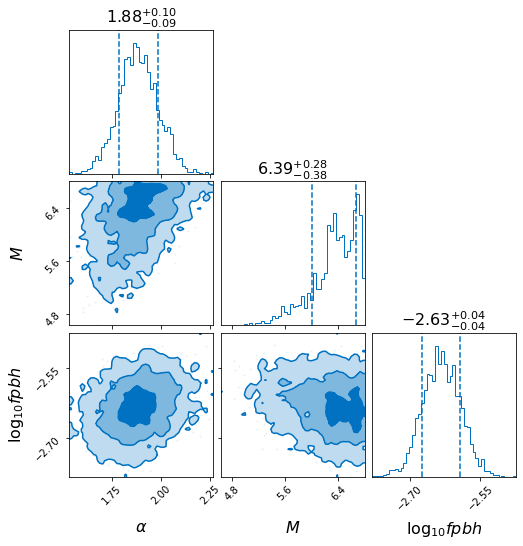

In [12]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=32, parallel=2000, check_point_delta_t=60)
result.plot_corner()
